In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import nltk

from nltk.tokenize import word_tokenize  # Split sentence into words and keep those words in form of a list
from keras.preprocessing.text import Tokenizer  # Converts words into numeric values
from tensorflow.keras.preprocessing.sequence import pad_sequences  # Equals all the sentences by filling 0
from keras.models import Sequential
from keras.layers import Embedding, LSTM, Dense, Dropout

import warnings
warnings.filterwarnings('ignore')

/Applications/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
2023-05-13 13:41:58.518446: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
tweet_df = pd.read_csv('Data/twitter_1.csv', encoding='ISO-8859-1', header=None).sample(frac=0.05).reset_index()

In [3]:
tweet_df

,index,0,1,2,3,4,5
0,226683,0,1977903046,Sat May 30 21:58:21 PDT 2009,NO_QUERY,cocoachanel,@azizijones my bad! they took away the compute...
1,334673,0,2013626974,Tue Jun 02 23:08:52 PDT 2009,NO_QUERY,8beatbasic,No dancing for me tonight... Fairly bummed abo...
2,393247,0,2055352220,Sat Jun 06 09:09:36 PDT 2009,NO_QUERY,limeice,I'd prolly be in Bombay for half a day next Su...
3,638360,0,2234437414,Thu Jun 18 23:03:19 PDT 2009,NO_QUERY,ItsArianaFoo,I know even though you still fell asleep a lo...
4,1044189,4,1957413054,Fri May 29 00:25:27 PDT 2009,NO_QUERY,rachelsaayWHAT,I got the b minor down. Slightly.
...,...,...,...,...,...,...,...
79995,808014,4,1469110786,Tue Apr 07 05:14:42 PDT 2009,NO_QUERY,yvonnert,@da_ewok if you have 2 golden retrievers you...
79996,1027494,4,1932463125,Tue May 26 21:31:03 PDT 2009,NO_QUERY,rolly_h,@KimShahan: I'm still up 2... Who needs sleep ...
79997,1116164,4,1973088503,Sat May 30 10:27:47 PDT 2009,NO_QUERY,joshhalliday,So I'm hoping to break into Django/Python over...
79998,66700,0,1691932031,Sun May 03 18:55:15 PDT 2009,NO_QUERY,Ari978,@hermorrine Car stereo?? I'm sorry she's sti...


In [4]:
tweet_df.columns = ['index','sentiment', 'id', 'date', 'query', 'user_name', 'tweet']

In [5]:
tweet_df

,index,sentiment,id,date,query,user_name,tweet
0,226683,0,1977903046,Sat May 30 21:58:21 PDT 2009,NO_QUERY,cocoachanel,@azizijones my bad! they took away the compute...
1,334673,0,2013626974,Tue Jun 02 23:08:52 PDT 2009,NO_QUERY,8beatbasic,No dancing for me tonight... Fairly bummed abo...
2,393247,0,2055352220,Sat Jun 06 09:09:36 PDT 2009,NO_QUERY,limeice,I'd prolly be in Bombay for half a day next Su...
3,638360,0,2234437414,Thu Jun 18 23:03:19 PDT 2009,NO_QUERY,ItsArianaFoo,I know even though you still fell asleep a lo...
4,1044189,4,1957413054,Fri May 29 00:25:27 PDT 2009,NO_QUERY,rachelsaayWHAT,I got the b minor down. Slightly.
...,...,...,...,...,...,...,...
79995,808014,4,1469110786,Tue Apr 07 05:14:42 PDT 2009,NO_QUERY,yvonnert,@da_ewok if you have 2 golden retrievers you...
79996,1027494,4,1932463125,Tue May 26 21:31:03 PDT 2009,NO_QUERY,rolly_h,@KimShahan: I'm still up 2... Who needs sleep ...
79997,1116164,4,1973088503,Sat May 30 10:27:47 PDT 2009,NO_QUERY,joshhalliday,So I'm hoping to break into Django/Python over...
79998,66700,0,1691932031,Sun May 03 18:55:15 PDT 2009,NO_QUERY,Ari978,@hermorrine Car stereo?? I'm sorry she's sti...


In [6]:
tweet_df.drop(['index','id', 'date', 'query', 'user_name'], inplace=True, axis=1)

In [7]:
tweet_df

,sentiment,tweet
0,0,@azizijones my bad! they took away the compute...
1,0,No dancing for me tonight... Fairly bummed abo...
2,0,I'd prolly be in Bombay for half a day next Su...
3,0,I know even though you still fell asleep a lo...
4,4,I got the b minor down. Slightly.
...,...,...
79995,4,@da_ewok if you have 2 golden retrievers you...
79996,4,@KimShahan: I'm still up 2... Who needs sleep ...
79997,4,So I'm hoping to break into Django/Python over...
79998,0,@hermorrine Car stereo?? I'm sorry she's sti...


In [8]:
tweet_df.sentiment.value_counts()

sentiment
0    40112
4    39888
Name: count, dtype: int64

### Data Visualisation

<AxesSubplot:xlabel='sentiment', ylabel='count'>

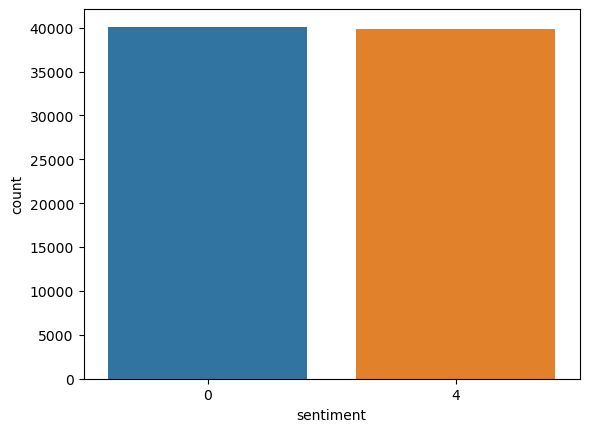

In [9]:
sns.countplot(data=tweet_df, x='sentiment')

### Data Pre-Processing

In [12]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/shashivarna/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [13]:
text_1 = tweet_df['tweet'][0]
print(text_1)

print(word_tokenize(text_1))

@azizijones my bad! they took away the computer from me 
['@', 'azizijones', 'my', 'bad', '!', 'they', 'took', 'away', 'the', 'computer', 'from', 'me']


In [14]:
corpus=[]
for text in tweet_df['tweet']:
    words = [word.lower() for word in word_tokenize(text)]
    corpus.append(words)

In [15]:
num_words=len(corpus)
print(num_words)

80000


In [16]:
tweet_df.shape

(80000, 2)

In [17]:
tweet_df['tweet']=tweet_df['tweet'].str.lower()

In [18]:
tweet_df

,sentiment,tweet
0,0,@azizijones my bad! they took away the compute...
1,0,no dancing for me tonight... fairly bummed abo...
2,0,i'd prolly be in bombay for half a day next su...
3,0,i know even though you still fell asleep a lo...
4,4,i got the b minor down. slightly.
...,...,...
79995,4,@da_ewok if you have 2 golden retrievers you...
79996,4,@kimshahan: i'm still up 2... who needs sleep ...
79997,4,so i'm hoping to break into django/python over...
79998,0,@hermorrine car stereo?? i'm sorry she's sti...


In [19]:
from nltk.corpus import stopwords
stpwrds = stopwords.words('english')
len(stpwrds)

179

In [20]:
# Removing stopwords from the review column
tweet_df['tweet']=tweet_df['tweet'].apply(lambda x:" ".join(word for word in x.split() if word not in stpwrds))

In [21]:
tweet_df

,sentiment,tweet
0,0,@azizijones bad! took away computer
1,0,dancing tonight... fairly bummed
2,0,i'd prolly bombay half day next sunday.. wish ...
3,0,know even though still fell asleep lot! haha s...
4,4,got b minor down. slightly.
...,...,...
79995,4,@da_ewok 2 golden retrievers never ever bored
79996,4,@kimshahan: i'm still 2... needs sleep anyways
79997,4,i'm hoping break django/python summer (http://...
79998,0,@hermorrine car stereo?? i'm sorry still feeli...


In [22]:
import string # special operations on strings like removing the punctuations from the sentences
def remove_punc(text):
    no_punc= text.translate(str.maketrans('', '', string.punctuation))
    return no_punc

In [23]:
tweet_df['tweet']=tweet_df['tweet'].apply(remove_punc)

In [24]:
tweet_df

,sentiment,tweet
0,0,azizijones bad took away computer
1,0,dancing tonight fairly bummed
2,0,id prolly bombay half day next sunday wish cou...
3,0,know even though still fell asleep lot haha sh...
4,4,got b minor down slightly
...,...,...
79995,4,daewok 2 golden retrievers never ever bored
79996,4,kimshahan im still 2 needs sleep anyways
79997,4,im hoping break djangopython summer httpisgdjz...
79998,0,hermorrine car stereo im sorry still feeling w...


### Label Encoding

In [25]:
from sklearn.preprocessing import LabelEncoder
en=LabelEncoder()
tweet_df['sentiment']=en.fit_transform(tweet_df['sentiment'])

In [26]:
tweet_df

,sentiment,tweet
0,0,azizijones bad took away computer
1,0,dancing tonight fairly bummed
2,0,id prolly bombay half day next sunday wish cou...
3,0,know even though still fell asleep lot haha sh...
4,1,got b minor down slightly
...,...,...
79995,1,daewok 2 golden retrievers never ever bored
79996,1,kimshahan im still 2 needs sleep anyways
79997,1,im hoping break djangopython summer httpisgdjz...
79998,0,hermorrine car stereo im sorry still feeling w...


### Splitting the Data

In [27]:
x = tweet_df['tweet']
y = tweet_df['sentiment']

In [28]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test=train_test_split(x, y, test_size=0.25, random_state=42)

In [29]:
train_size = int(tweet_df.shape[0]*0.8)
x_train = tweet_df['tweet'][:train_size]
y_train = tweet_df['sentiment'][:train_size]

x_test = tweet_df['tweet'][train_size:]
y_test = tweet_df['sentiment'][train_size:]

In [30]:
train_size, x_train.shape, y_train.shape, x_test.shape, y_test.shape

(64000, (64000,), (64000,), (16000,), (16000,))

### Tokenizing & Padding

In [31]:
tokenizer = Tokenizer(num_words)
tokenizer.fit_on_texts(x_train)
x_train = tokenizer.texts_to_sequences(x_train)
x_train = pad_sequences(x_train, maxlen = 30, truncating = 'post', padding='post')

In [32]:
x_train[1], len(x_train[1])

(array([1092,   57, 3853,  891,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0], dtype=int32),
 30)

In [33]:
x_test = tokenizer.texts_to_sequences(x_test)
x_test = pad_sequences(x_test, maxlen = 30, truncating = 'post', padding='post')

In [34]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((64000, 30), (64000,), (16000, 30), (16000,))

### LSTM Model Building

In [35]:
lstm_model =  Sequential()
lstm_model.add(Embedding(input_dim=num_words, output_dim=100, input_length=30, trainable=True))
lstm_model.add(LSTM(100, dropout=0.1, return_sequences=True))
lstm_model.add(LSTM(100, dropout=0.1))
lstm_model.add(Dense(1, activation='sigmoid'))
lstm_model.summary()

2023-05-13 13:57:34.590533: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-05-13 13:57:34.593444: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-05-13 13:57:34.596042: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 30, 100)           8000000   
                                                                 
 lstm (LSTM)                 (None, 30, 100)           80400     
                                                                 
 lstm_1 (LSTM)               (None, 100)               80400     
                                                                 
 dense (Dense)               (None, 1)                 101       
                                                                 
Total params: 8,160,901
Trainable params: 8,160,901
Non-trainable params: 0
_________________________________________________________________


2023-05-13 13:57:34.998002: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-05-13 13:57:35.001006: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-05-13 13:57:35.003154: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

### Compile & Fit the Model

In [36]:
lstm_model.compile(loss='binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [37]:
import tensorflow as tf
early_stopping=tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0.001,
    patience=5,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=False,
)

In [38]:
history = lstm_model.fit(x_train, y_train, epochs=100, batch_size=256, 
              validation_data=(x_test, y_test), callbacks=early_stopping, verbose=True)

Epoch 1/100


2023-05-13 13:58:17.391859: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-05-13 13:58:17.393798: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-05-13 13:58:17.395554: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

250/250 [==============================] - ETA: 0s - loss: 0.5568 - accuracy: 0.7005

2023-05-13 14:00:13.167154: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-05-13 14:00:13.170143: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-05-13 14:00:13.172679: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

250/250 [==============================] - 123s 468ms/step - loss: 0.5568 - accuracy: 0.7005 - val_loss: 0.5044 - val_accuracy: 0.7555
Epoch 2/100
250/250 [==============================] - 115s 459ms/step - loss: 0.3755 - accuracy: 0.8383 - val_loss: 0.5407 - val_accuracy: 0.7447
Epoch 3/100
250/250 [==============================] - 168s 673ms/step - loss: 0.2331 - accuracy: 0.9077 - val_loss: 0.7257 - val_accuracy: 0.7183
Epoch 4/100
250/250 [==============================] - 134s 536ms/step - loss: 0.1585 - accuracy: 0.9375 - val_loss: 0.9274 - val_accuracy: 0.7166
Epoch 5/100
250/250 [==============================] - 188s 754ms/step - loss: 0.1249 - accuracy: 0.9501 - val_loss: 0.8178 - val_accuracy: 0.7134
Epoch 6/100
250/250 [==============================] - 201s 804ms/step - loss: 0.1007 - accuracy: 0.9590 - val_loss: 0.9962 - val_accuracy: 0.7143
Epoch 6: early stopping


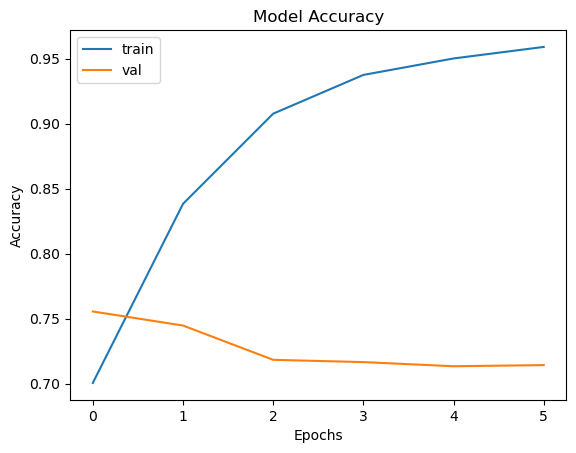

In [40]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title("Model Accuracy")
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

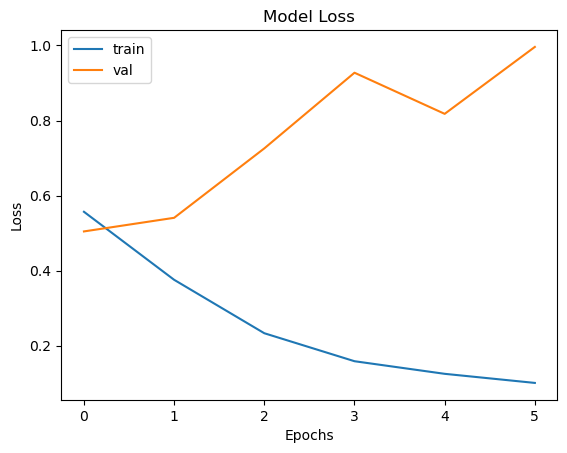

In [41]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title("Model Loss")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [42]:
lstm_model.evaluate(x_test, y_test)

500/500 [==============================] - 20s 40ms/step - loss: 0.9962 - accuracy: 0.7143


[0.9961506128311157, 0.7142500281333923]

So we got 71.43% Test Accuracy with LSTM Model.

### GRU Building Model

In [43]:
from tensorflow.keras.layers import Embedding, GRU, Dense

In [44]:
gru_model = Sequential()
gru_model.add(Embedding(input_dim=num_words, output_dim=100, input_length=30, trainable=True))
gru_model.add(GRU(100, dropout=0.1, return_sequences=True))
gru_model.add(GRU(100, dropout=0.1))
gru_model.add(Dense(1, activation='sigmoid'))

gru_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
gru_model.fit(x_train, y_train, epochs=10, batch_size=128, validation_data=(x_test, y_test))

2023-05-13 14:58:35.600834: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-05-13 14:58:35.606131: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-05-13 14:58:35.609746: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

Epoch 1/10


2023-05-13 14:58:36.770301: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-05-13 14:58:36.773780: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-05-13 14:58:36.776369: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

500/500 [==============================] - ETA: 0s - loss: 0.6933 - accuracy: 0.4987

2023-05-13 15:01:30.641506: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-05-13 15:01:30.647769: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-05-13 15:01:30.651498: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

500/500 [==============================] - 182s 349ms/step - loss: 0.6933 - accuracy: 0.4987 - val_loss: 0.6931 - val_accuracy: 0.5036
Epoch 2/10
500/500 [==============================] - 169s 338ms/step - loss: 0.5467 - accuracy: 0.7218 - val_loss: 0.4935 - val_accuracy: 0.7591
Epoch 3/10
500/500 [==============================] - 172s 345ms/step - loss: 0.3391 - accuracy: 0.8570 - val_loss: 0.5670 - val_accuracy: 0.7389
Epoch 4/10
500/500 [==============================] - 171s 342ms/step - loss: 0.1760 - accuracy: 0.9312 - val_loss: 0.6921 - val_accuracy: 0.7315
Epoch 5/10
500/500 [==============================] - 163s 327ms/step - loss: 0.1029 - accuracy: 0.9609 - val_loss: 0.8982 - val_accuracy: 0.7311
Epoch 6/10
500/500 [==============================] - 164s 327ms/step - loss: 0.0710 - accuracy: 0.9726 - val_loss: 1.0494 - val_accuracy: 0.7236
Epoch 7/10
500/500 [==============================] - 164s 327ms/step - loss: 0.0534 - accuracy: 0.9787 - val_loss: 1.1356 - val_accura

In [45]:
gru_model.evaluate(x_test, y_test)

2023-05-13 16:06:31.691618: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-05-13 16:06:31.695685: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-05-13 16:06:31.698777: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

500/500 [==============================] - 10s 18ms/step - loss: 1.4753 - accuracy: 0.7160


[1.4753390550613403, 0.7160000205039978]

GRU Model gives 71.60%, almost same as LSTM Model